#### Author: Artem Golotin
CS501R Lab 3

In [1]:
from pdb import set_trace as debugger
from tqdm import tqdm
from math import log, exp
import numpy as np
import scipy

def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

W = np.random.randn(D, D)
step_size = 0.1
h = 0.000001

def accuracy(_w):
    predictions = np.argmax(features.dot(_w), axis=1).reshape(N, 1)
    return ((predictions == labels).sum()) / float(N)

def loss_function(_w):
    scores = features.dot(_w)
    prob = scores[np.arange(N).reshape(N,1), labels]
    return np.mean(-np.log(np.exp(prob) / np.sum(np.exp(scores), axis=1).reshape(N, 1)))

def evaluate_gradient(W, init_loss):
    total_loss = np.zeros((D, D))
    delta_gradient = np.zeros((D, D))
    for dim in xrange(W.shape[0]):
        for inst in xrange(W.shape[1]):
            # Twiddle W by h
            _w = W
            _w[dim, inst] += h
            # Compute the loss
            Loss_i = loss_function(_w)
            total_loss[dim, inst] = Loss_i
            # Compute delta gradient
            d_grad = (Loss_i - init_loss) / h
            delta_gradient[dim, inst] = d_grad
    return delta_gradient, np.mean(total_loss)        

total_losses = []
total_accuracy = []
for epoch in tqdm(xrange(1000)):
    # Calculate initial loss
    init_loss = loss_function(W)
    # Calculate the gradient and the total loss
    gradient, loss = evaluate_gradient(W, init_loss)
    # Update weights
    W += -step_size * gradient
    # Save loss to graph later
    total_losses.append(loss)
    # Calculate accuracy
    total_accuracy.append(accuracy(W))

100%|██████████| 1000/1000 [00:51<00:00, 21.72it/s]


In [2]:
import matplotlib.pyplot as plt

def plot_loss():
    x = range(1,1001)
    plt.plot(x, total_losses)
    plt.title("Cost Function (softmax)")
    plt.xlabel("Epoch")
    plt.show()
    
def plot_accuracy():
    x = range(1,1001)
    plt.plot(x, total_accuracy)
    plt.title("Classification Accuracy (%)")
    plt.xlabel("Epoch")
    plt.show()


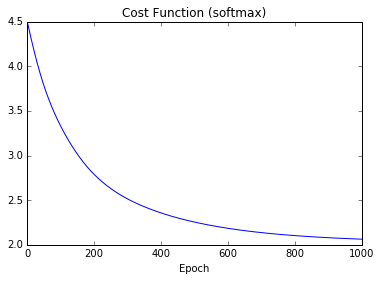

In [3]:
%matplotlib inline
plot_loss()

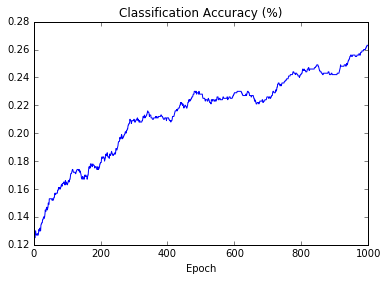

In [4]:
%matplotlib inline
plot_accuracy()